In [1]:
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import glob
import os

In [2]:
config = tf.compat.v1.ConfigProto(allow_soft_placement=True)
config.gpu_options.per_process_gpu_memory_fraction = 0.6
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

In [3]:
#gpus = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_virtual_device_configuration(gpus[0],[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=3072)])

In [4]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [5]:
data=glob.glob(r'E:/mydata/data/xmls/*.xml')
path=[]
for i in data:
    a=i.split('\\')[-1]
    b=a.split('.xml')[0]
    path.append(b)
imgpath=[]
for i in path:
    c='E:/mydata/images/'+i+'.jpg'
    imgpath.append(c)
imgpath

['E:/mydata/images/Abyssinian_1.jpg',
 'E:/mydata/images/Abyssinian_10.jpg',
 'E:/mydata/images/Abyssinian_100.jpg',
 'E:/mydata/images/Abyssinian_101.jpg',
 'E:/mydata/images/Abyssinian_102.jpg',
 'E:/mydata/images/Abyssinian_103.jpg',
 'E:/mydata/images/Abyssinian_105.jpg',
 'E:/mydata/images/Abyssinian_106.jpg',
 'E:/mydata/images/Abyssinian_107.jpg',
 'E:/mydata/images/Abyssinian_108.jpg',
 'E:/mydata/images/Abyssinian_109.jpg',
 'E:/mydata/images/Abyssinian_11.jpg',
 'E:/mydata/images/Abyssinian_110.jpg',
 'E:/mydata/images/Abyssinian_111.jpg',
 'E:/mydata/images/Abyssinian_112.jpg',
 'E:/mydata/images/Abyssinian_113.jpg',
 'E:/mydata/images/Abyssinian_114.jpg',
 'E:/mydata/images/Abyssinian_115.jpg',
 'E:/mydata/images/Abyssinian_116.jpg',
 'E:/mydata/images/Abyssinian_117.jpg',
 'E:/mydata/images/Abyssinian_118.jpg',
 'E:/mydata/images/Abyssinian_119.jpg',
 'E:/mydata/images/Abyssinian_12.jpg',
 'E:/mydata/images/Abyssinian_120.jpg',
 'E:/mydata/images/Abyssinian_121.jpg',
 'E:/

In [6]:
len(imgpath)

3686

In [7]:
imgpath2=glob.glob('E:/mydata/trimaps/*.png')
imgpath2

['E:/mydata/trimaps\\Abyssinian_1.png',
 'E:/mydata/trimaps\\Abyssinian_10.png',
 'E:/mydata/trimaps\\Abyssinian_100.png',
 'E:/mydata/trimaps\\Abyssinian_101.png',
 'E:/mydata/trimaps\\Abyssinian_102.png',
 'E:/mydata/trimaps\\Abyssinian_103.png',
 'E:/mydata/trimaps\\Abyssinian_104.png',
 'E:/mydata/trimaps\\Abyssinian_105.png',
 'E:/mydata/trimaps\\Abyssinian_106.png',
 'E:/mydata/trimaps\\Abyssinian_107.png',
 'E:/mydata/trimaps\\Abyssinian_108.png',
 'E:/mydata/trimaps\\Abyssinian_109.png',
 'E:/mydata/trimaps\\Abyssinian_11.png',
 'E:/mydata/trimaps\\Abyssinian_110.png',
 'E:/mydata/trimaps\\Abyssinian_111.png',
 'E:/mydata/trimaps\\Abyssinian_112.png',
 'E:/mydata/trimaps\\Abyssinian_113.png',
 'E:/mydata/trimaps\\Abyssinian_114.png',
 'E:/mydata/trimaps\\Abyssinian_115.png',
 'E:/mydata/trimaps\\Abyssinian_116.png',
 'E:/mydata/trimaps\\Abyssinian_117.png',
 'E:/mydata/trimaps\\Abyssinian_118.png',
 'E:/mydata/trimaps\\Abyssinian_119.png',
 'E:/mydata/trimaps\\Abyssinian_12.png

In [8]:
def img_read(imgpaths):
    img=tf.io.read_file(imgpaths)
    img=tf.image.decode_jpeg(img,channels=3)
    img=tf.image.resize(img,[224,224])
    img=tf.cast(img,tf.float32)
    img=img/127.5-1
    return img

In [9]:
def img_data(name):
    imgs=tf.io.read_file(name)
    imgs=tf.image.decode_png(imgs,channels=1)
    imgs=tf.image.resize(imgs,[224,224])
    imgs=tf.cast(imgs,tf.float32)
    imgs=imgs-1
    return imgs

In [10]:
img_read('E:/mydata/images/Abyssinian_110.jpg')

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[ 2.32154727e-01,  2.32154727e-01,  1.25468969e-02],
        [ 2.33666658e-01,  2.25823522e-01,  6.21569157e-03],
        [ 2.59828329e-01,  2.29296207e-01,  3.23773623e-02],
        ...,
        [ 4.40020442e-01,  4.24334168e-01,  4.63549852e-01],
        [ 4.22760606e-01,  4.07074332e-01,  4.46290016e-01],
        [ 4.66882586e-01,  4.51196313e-01,  4.90411997e-01]],

       [[ 2.09348083e-01,  2.09348083e-01, -1.02597475e-02],
        [ 1.96973085e-01,  1.84140563e-01, -2.04988122e-02],
        [ 2.08000779e-01,  1.77290201e-01, -1.90938711e-02],
        ...,
        [ 4.89956975e-01,  4.74270701e-01,  5.13486385e-01],
        [ 5.26367307e-01,  5.10681033e-01,  5.49896717e-01],
        [ 5.53797841e-01,  5.38111567e-01,  5.77327251e-01]],

       [[ 2.18784928e-01,  2.18784928e-01,  1.22547150e-04],
        [ 1.99544787e-01,  1.83858514e-01, -1.12745166e-02],
        [ 2.15791225e-01,  1.84523106e-01, -1.01540089e-02],


In [11]:
data_img1=tf.data.Dataset.from_tensor_slices(imgpath)
data_img2=tf.data.Dataset.from_tensor_slices(imgpath2)
data_jpg=data_img1.map(img_read)
data_png=data_img2.map(img_data)
all_data=tf.data.Dataset.zip((data_jpg,data_png))
all_data

<ZipDataset shapes: ((224, 224, 3), (224, 224, 1)), types: (tf.float32, tf.float32)>

In [12]:
train=all_data.take(len(imgpath))
ds=len(imgpath)-100
tarin_data=train.repeat().shuffle(buffer_size=ds).batch(10)
tarin_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 224, 224, 1)), types: (tf.float32, tf.float32)>

In [13]:
my_model=tf.keras.applications.VGG16(input_shape=(224,224,3),
                                    include_top=False,
                                    weights='imagenet')                                        

In [14]:
my_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [15]:
layers_name=['block5_conv3','block4_conv3','block3_conv3','block5_pool']
layers_out=[my_model.get_layer(x).output for x in layers_name]
model_data=tf.keras.models.Model(inputs=my_model.input,outputs=layers_out)

In [16]:
my_model.trainable=False

In [17]:
inputs=tf.keras.layers.Input(shape=(224,224,3))

In [18]:
x1,x2,x3,x4=model_data(inputs)

In [19]:
data1=tf.keras.layers.Conv2DTranspose(512,3,padding='same',strides=2,activation='relu')(x4)
data1_=tf.keras.layers.Conv2D(512,3,padding='same',activation='relu')(data1)
model_1=tf.add(data1_,x1)
model_1.shape

TensorShape([None, 14, 14, 512])

In [20]:
data2=tf.keras.layers.Conv2DTranspose(512,3,padding='same',strides=2,activation='relu')(model_1)
data2_=tf.keras.layers.Conv2D(512,3,padding='same',activation='relu')(data2)
model_2=tf.add(data2_,x2)
model_2.shape

TensorShape([None, 28, 28, 512])

In [21]:
data3=tf.keras.layers.Conv2DTranspose(256,3,padding='same',strides=2,activation='relu')(model_2)
data3_=tf.keras.layers.Conv2D(256,3,padding='same',activation='relu')(data3)
model_3=tf.add(data3_,x3)
model_3.shape

TensorShape([None, 56, 56, 256])

In [22]:
model_4=tf.keras.layers.Conv2DTranspose(128,3,padding='same',strides=2,activation='relu')(model_3)
model_4_=tf.keras.layers.Conv2D(128,3,padding='same',activation='relu')(model_4)
model_5=tf.keras.layers.Conv2DTranspose(3,3,padding='same',strides=2,activation='softmax')(model_4_)
model_5.shape

TensorShape([None, 224, 224, 3])

In [23]:
model=tf.keras.models.Model(inputs=inputs,outputs=model_5)
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
functional_1 (Functional)       [(None, 14, 14, 512) 14714688    input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_transpose (Conv2DTranspo (None, 14, 14, 512)  2359808     functional_1[0][3]               
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 14, 14, 512)  2359808     conv2d_transpose[0][0]           
_______________________________________________________________________________________

In [23]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [24]:
num=len(imgpath)//5

In [25]:
model.fit(tarin_data,epochs=20,steps_per_epoch=num)

Train for 737 steps
Epoch 1/20
737/737 [==============================] - 294s 398ms/step - loss: 0.7934 - acc: 0.6600
Epoch 2/20
737/737 [==============================] - 269s 365ms/step - loss: 0.7549 - acc: 0.6849
Epoch 3/20
737/737 [==============================] - 261s 355ms/step - loss: 0.7338 - acc: 0.6960
Epoch 4/20
737/737 [==============================] - 260s 352ms/step - loss: 0.7008 - acc: 0.7120
Epoch 5/20
737/737 [==============================] - 255s 346ms/step - loss: 0.6330 - acc: 0.7426
Epoch 6/20
737/737 [==============================] - 255s 347ms/step - loss: 0.5439 - acc: 0.7789
Epoch 7/20
737/737 [==============================] - 254s 345ms/step - loss: 0.4492 - acc: 0.8137
Epoch 8/20
737/737 [==============================] - 254s 344ms/step - loss: 0.3734 - acc: 0.8416
Epoch 9/20
737/737 [==============================] - 253s 343ms/step - loss: 0.3125 - acc: 0.8651
Epoch 10/20
737/737 [==============================] - 254s 345ms/step - loss: 0.2677 - a

In [27]:
#model.save(r'E:/杂物/唐某模型/语义分割-FCN.h5')

In [62]:
#model=tf.keras.models.load_model(r'E:/杂物/唐某模型/语义feng'r'E:/杂物/唐某模型/语义分割-FCN.h5')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


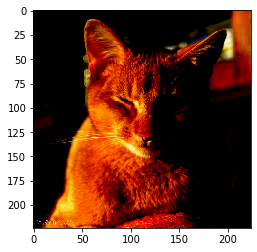

In [44]:
imgs=img_read(imgpath[14])
plt.imshow(imgs)
#plt.savefig('E:/杂物/语义3.jpg')

In [45]:
new_img=tf.expand_dims(imgs,0)

In [46]:
data_img=model.predict(new_img)

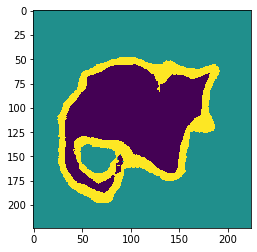

In [47]:
my_img=tf.argmax(data_img,axis=-1)
my_imgs=my_img[...,tf.newaxis]
png=tf.keras.preprocessing.image.array_to_img(my_imgs[0])
plt.imshow(png)
#plt.savefig('E:/杂物/语义3_.jpg')